## 1. Perkenalan

<b>Latar Belakang:</b>  
Dalam era digital dan e-commerce yang semakin berkembang, pengiriman barang menjadi faktor kunci dalam kepuasan pelanggan. Dalam konteks ini, tepat waktu menjadi parameter penting yang menentukan keberhasilan sebuah layanan pengiriman. Sebuah sistem yang dapat memprediksi apakah pengiriman akan tepat waktu atau tidak dapat membantu perusahaan e-commerce dalam mengoptimalkan proses mereka. Hal ini dapat mengurangi biaya, meningkatkan kepuasan pelanggan, dan memperkuat reputasi merek.

<b>Problem Statement:</b>  
Meskipun layanan pengiriman barang telah berkembang pesat dalam beberapa tahun terakhir, masih ada tantangan besar dalam memastikan pengiriman barang kepada pelanggan tepat waktu. Beberapa masalah seperti ketidakpastian dalam pengiriman, kerugian akibat pengiriman tidak tepat waktu bisa menjadi masalah yang besar untuk perusahaan. Oleh karena itu, saya ingin mengembangkan sebuah model prediksi yang dapat memperkirakan apakah pengiriman barang akan tepat waktu atau tidak. Model yang saya kembangkan diharapkan dapat memberikan pandangan yang lebih baik kepada perusahaan tentang kapan mereka harus melakukan intervensi atau penyesuaian dalam proses pengiriman untuk memastikan pengiriman tepat waktu kepada pelanggan.


## 2. Import Libraries

In [1]:
# Melakukan import libraries
import pandas as pd
import numpy as np
import pickle
import json
from scipy import stats
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from scipy.stats import uniform, randint

## 3. Data Loading

>Dataset mengandung kolom-kolom seperti:

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product - has NOT reached on time and 0 indicates it has reached on time.

In [2]:
# Meload data dari csv ke dataframe
df = pd.read_csv("shippingData.csv")
pd.set_option('display.max_columns', None)
print(df.info())

# Menampilkan data 10 pertama dan terakhir
display(df.head(10))
display(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Setelah melakukan data loading kita bisa melihat bahwa datanya memiliki 10,999 baris dan 12 kolom. Datasetnya sendiri terdapat data numerical dan categorical. Kolom yang termasuk numerical adalah <b>Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms, dan Reached.on.Time_Y.N.</b> Sedangkan kolom yang termasuk kategorikal adalah <b>Warehouse_block, Mode_of_Shipment, Product_importance, dan Gender.</b> Kolom <b> ID </b> adalah identifier dan tidak akan digunakan pada saat analysis.

In [3]:
# Mengubah nama kolom
df.rename(columns={'Reached.on.Time_Y.N' : 'Reached_on_time'},inplace=True)

Melakukan perubahan nama kolom 'Reached.on.Time_Y.N' agar lebih mudah ketika melakukan pengerjaan

In [4]:
# Melakukan pengecekan distribusi data
distribution_check = df.select_dtypes(include=['number']).agg(['count', 'mean', 'median', 'skew', 'kurt', 'std', 'min', 'max'])
distribution_check.T

,count,mean,median,skew,kurt,std,min,max
ID,10999.0,5500.000000,5500.0,0.000000,-1.200000,3175.282140,1.0,10999.0
Customer_care_calls,10999.0,4.054459,4.0,0.391926,-0.308995,1.141490,2.0,7.0
Customer_rating,10999.0,2.990545,3.0,0.004360,-1.295654,1.413603,1.0,5.0
Cost_of_the_Product,10999.0,210.196836,214.0,-0.157117,-0.972160,48.063272,96.0,310.0
Prior_purchases,10999.0,3.567597,3.0,1.681897,4.006342,1.522860,2.0,10.0
Discount_offered,10999.0,13.373216,7.0,1.798929,2.000586,16.205527,1.0,65.0
Weight_in_gms,10999.0,3634.016729,4149.0,-0.249747,-1.447671,1635.377251,1001.0,7846.0
Reached_on_time,10999.0,0.596691,1.0,-0.394257,-1.844897,0.490584,0.0,1.0


Dari hasil diatas terlihat distribusi variabel numerik. Dapat diambil beberapa kesimpulan seperti, Customer_rating terdistribusi secara merata karena nilai meannya mendekati mediannya. Discount_offered dan Weight_in_gms menunjukkan rentang nilai yang luas, menunjukkan bahwa data tidak terdistribusi dengan normal dan ada kemungkinan terdapat outlier dikarenakan nilai skewnya lebih dari 0.5.

In [5]:
# Melakukan pencarian null value
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

Tidak terdapat null values pada data.

In [6]:
# Melakukan pencarian duplicate
df.duplicated().sum()

0

Setelah dilakukan pengecekan, tidak ditemukan adanya duplicate pada data.

In [7]:
# Melakukan drop kolom ID
df2 = df.drop(columns=['ID'])
df2

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


Karena kolom ID merupakan identifier dan kita tidak membutuhkannya, maka kita lakukan drop.

In [8]:
# Melihat berapa banyak data target
value_0 = df['Reached_on_time'].value_counts()[0]
value_1 = df['Reached_on_time'].value_counts()[1]

print("Jumlah nilai 0 'Reached_on_time':", value_0)
print("Jumlah nilai 1 'Reached_on_time':", value_1)

Jumlah nilai 0 'Reached_on_time': 4436
Jumlah nilai 1 'Reached_on_time': 6563


Dari hasil pengecekan dapat terlihat bahwa data value 0 sebanyak 4436, lebih sedikit dibandingkan value 1 berjumlah 6563 yang berarti lebih banyak produk yang tidak sampai tepat waktu dibandingkan yang sampai tepat waktu. Namun, datanya masih cukup seimbang dan tidak diperlukan untuk dilakukan handling imbalance data menggunakan SMOTE atau SMOTENC.

## 4. Exploratory Data Analysis (EDA)

### Melihat perbandingan berdasarkan Warehouse block

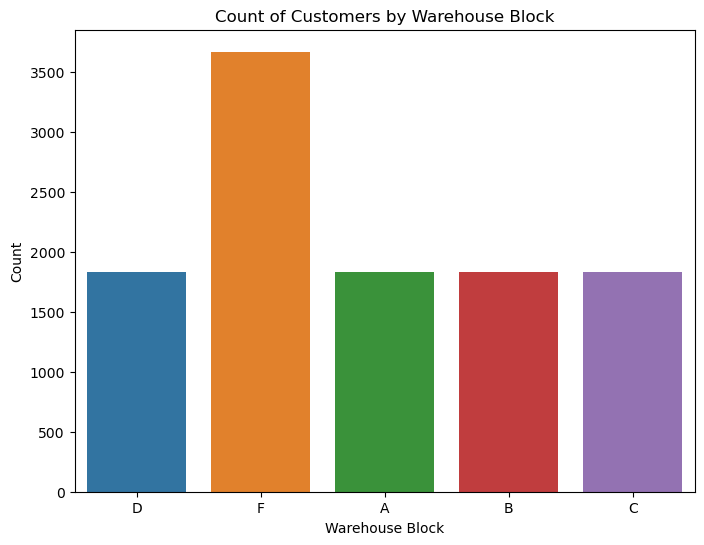

In [9]:
# Membuat barchart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Warehouse_block')
plt.title('Count of Customers by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.show()

 Pengiriman hampir merata di seluruh Warehouse Block yang berbeda, dengan jumlah yang sedikit lebih tinggi untuk blok 'F'.

### Melihat distribusi pengiriman berdasarkan Mode Of Shipment

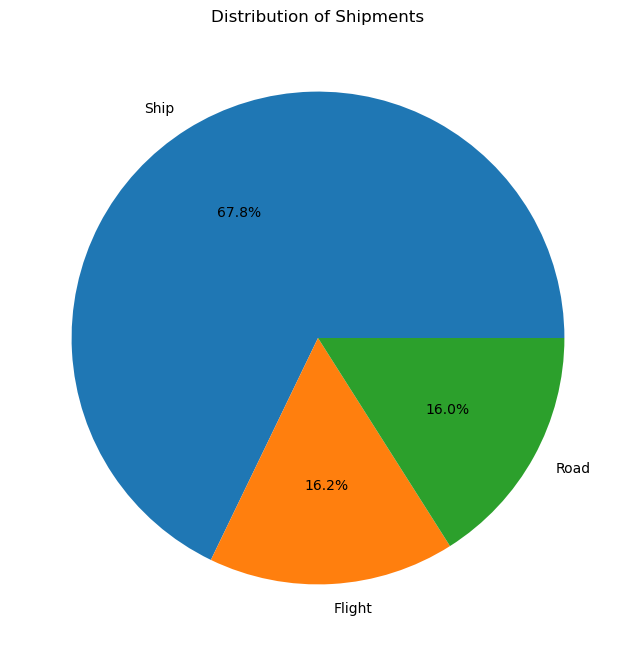

In [10]:
# Membuat piechart 
shipment_counts = df2['Mode_of_Shipment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shipments')
plt.show()

Dari hasil visualisasi diatas terlihat bahwa pengiriman paling banyak menggunakan Ship (kapal laut).

### Melihat distribusi data pada kolom Cost Of The Product

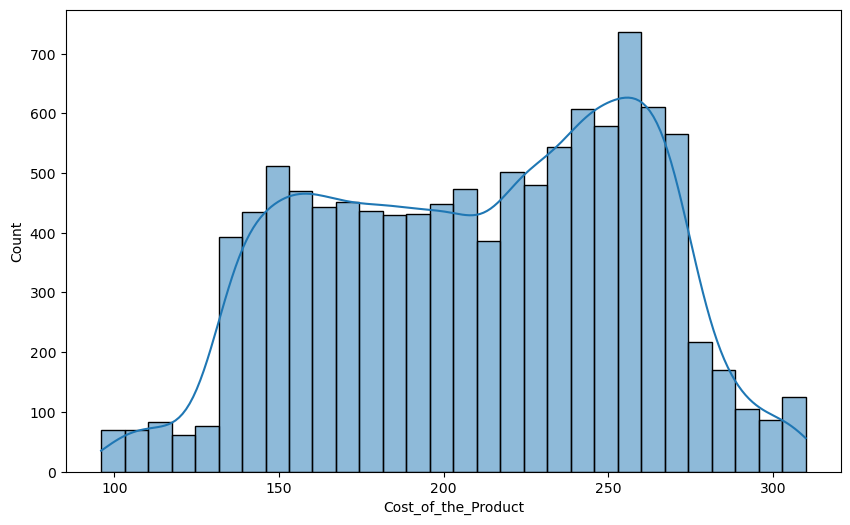

In [11]:
# Membuat histogram
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df, x='Cost_of_the_Product', kde=True)
plt.show() 

Distribusi cost of the product tampak right-skewed, yang menunjukkan bahwa terdapat lebih banyak produk berbiaya menengah dibandingkan produk berbiaya tinggi.

### Melihat hubungan antara jumlah Customer Care Calls dengan Reached On Time

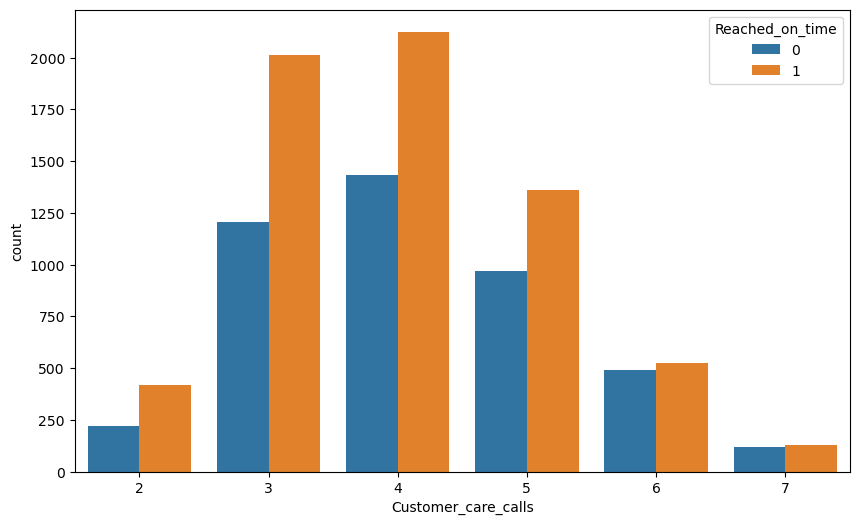

In [12]:
# Membuat barchart
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='Customer_care_calls', hue='Reached_on_time')
plt.show() 

Tampaknya ada tren di mana pengiriman dengan lebih sedikit Customer_care_calls  memiliki peluang lebih tinggi untuk dikirimkan tepat waktu. Ketika Customer_care_calls meningkat, proporsi keterlambatan pengiriman juga meningkat.

### Melihat hubungan antara beberapa kategori dengan Reached On Time

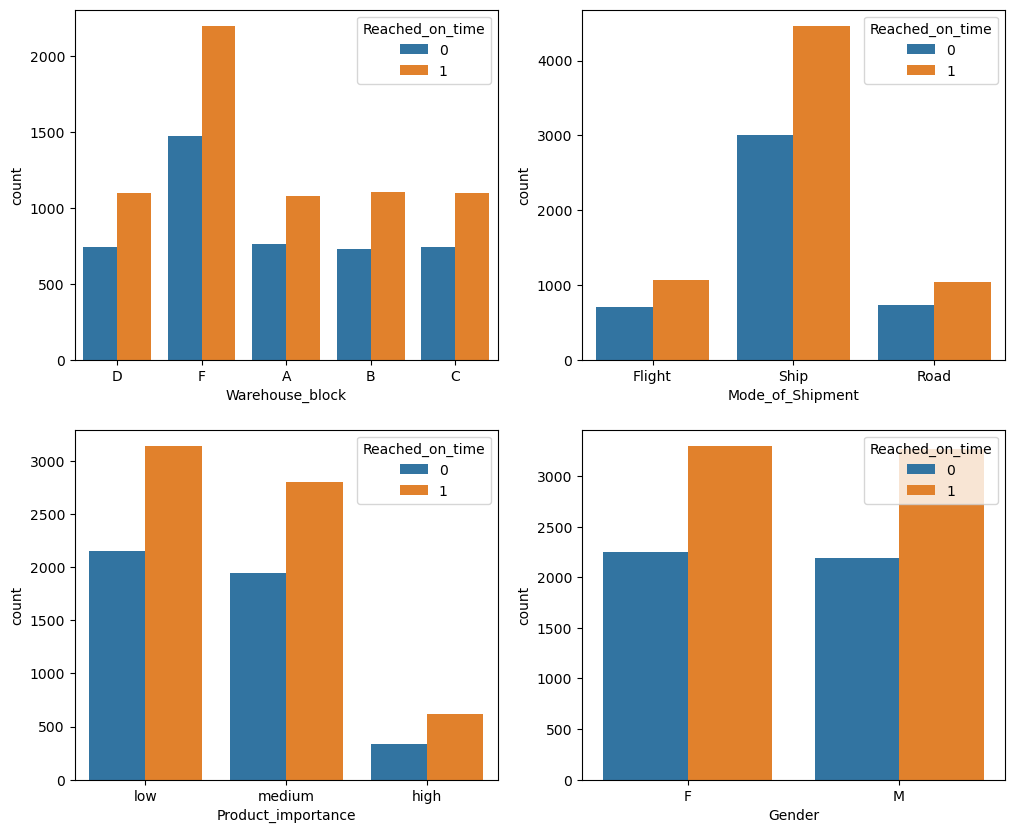

In [13]:
# Membuat beberapa barchart
visCat = df2[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']]

plt.figure(figsize=(12, 10))
for i, cat in enumerate(visCat, 1):
    plt.subplot(2, 2, i) 
    sns.countplot(data=df2, x=cat, hue='Reached_on_time')
plt.show()

Pengiriman dari Warehouse_block_F memiliki tingkat ketepatan waktu yang lebih tinggi dibandingkan dengan pengiriman lainnya. Kiriman yang dikirim melalui kapal laut memiliki tingkat kedatangan tepat waktu tertinggi, sedangkan kiriman melalui jalan darat memiliki tingkat kedatangan tepat waktu terendah. Produk yang diklasifikasikan sebagai produk dengan tingkat kepentingan 'rendah' memiliki tingkat pengiriman tepat waktu yang lebih tinggi dibandingkan dengan produk yang diklasifikasikan sebagai produk dengan tingkat kepentingan 'tinggi'. Kinerja pengiriman tampaknya hampir sama untuk kedua 'Gender', namun perempuan memiliki tingkat pengiriman tepat waktu yang sedikit lebih tinggi dibandingkan laki-laki.

## 5. Feature Engineering

### Feature Selection

In [14]:
# membuat variabel baru untuk kolom kategori dan numeric untuk mencari korelasi
num = df2[['Customer_care_calls','Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Reached_on_time']]
cat = df2[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached_on_time']]

cat

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Reached_on_time
0,D,Flight,low,F,1
1,F,Flight,low,M,1
2,A,Flight,low,M,1
3,B,Flight,medium,M,1
4,C,Flight,medium,F,1
...,...,...,...,...,...
10994,A,Ship,medium,F,1
10995,B,Ship,medium,F,0
10996,C,Ship,low,F,0
10997,F,Ship,medium,M,0


Dapat terlihat bahwa kolom numerical dan kategorikal sudah dipisahkan.

<Axes: >

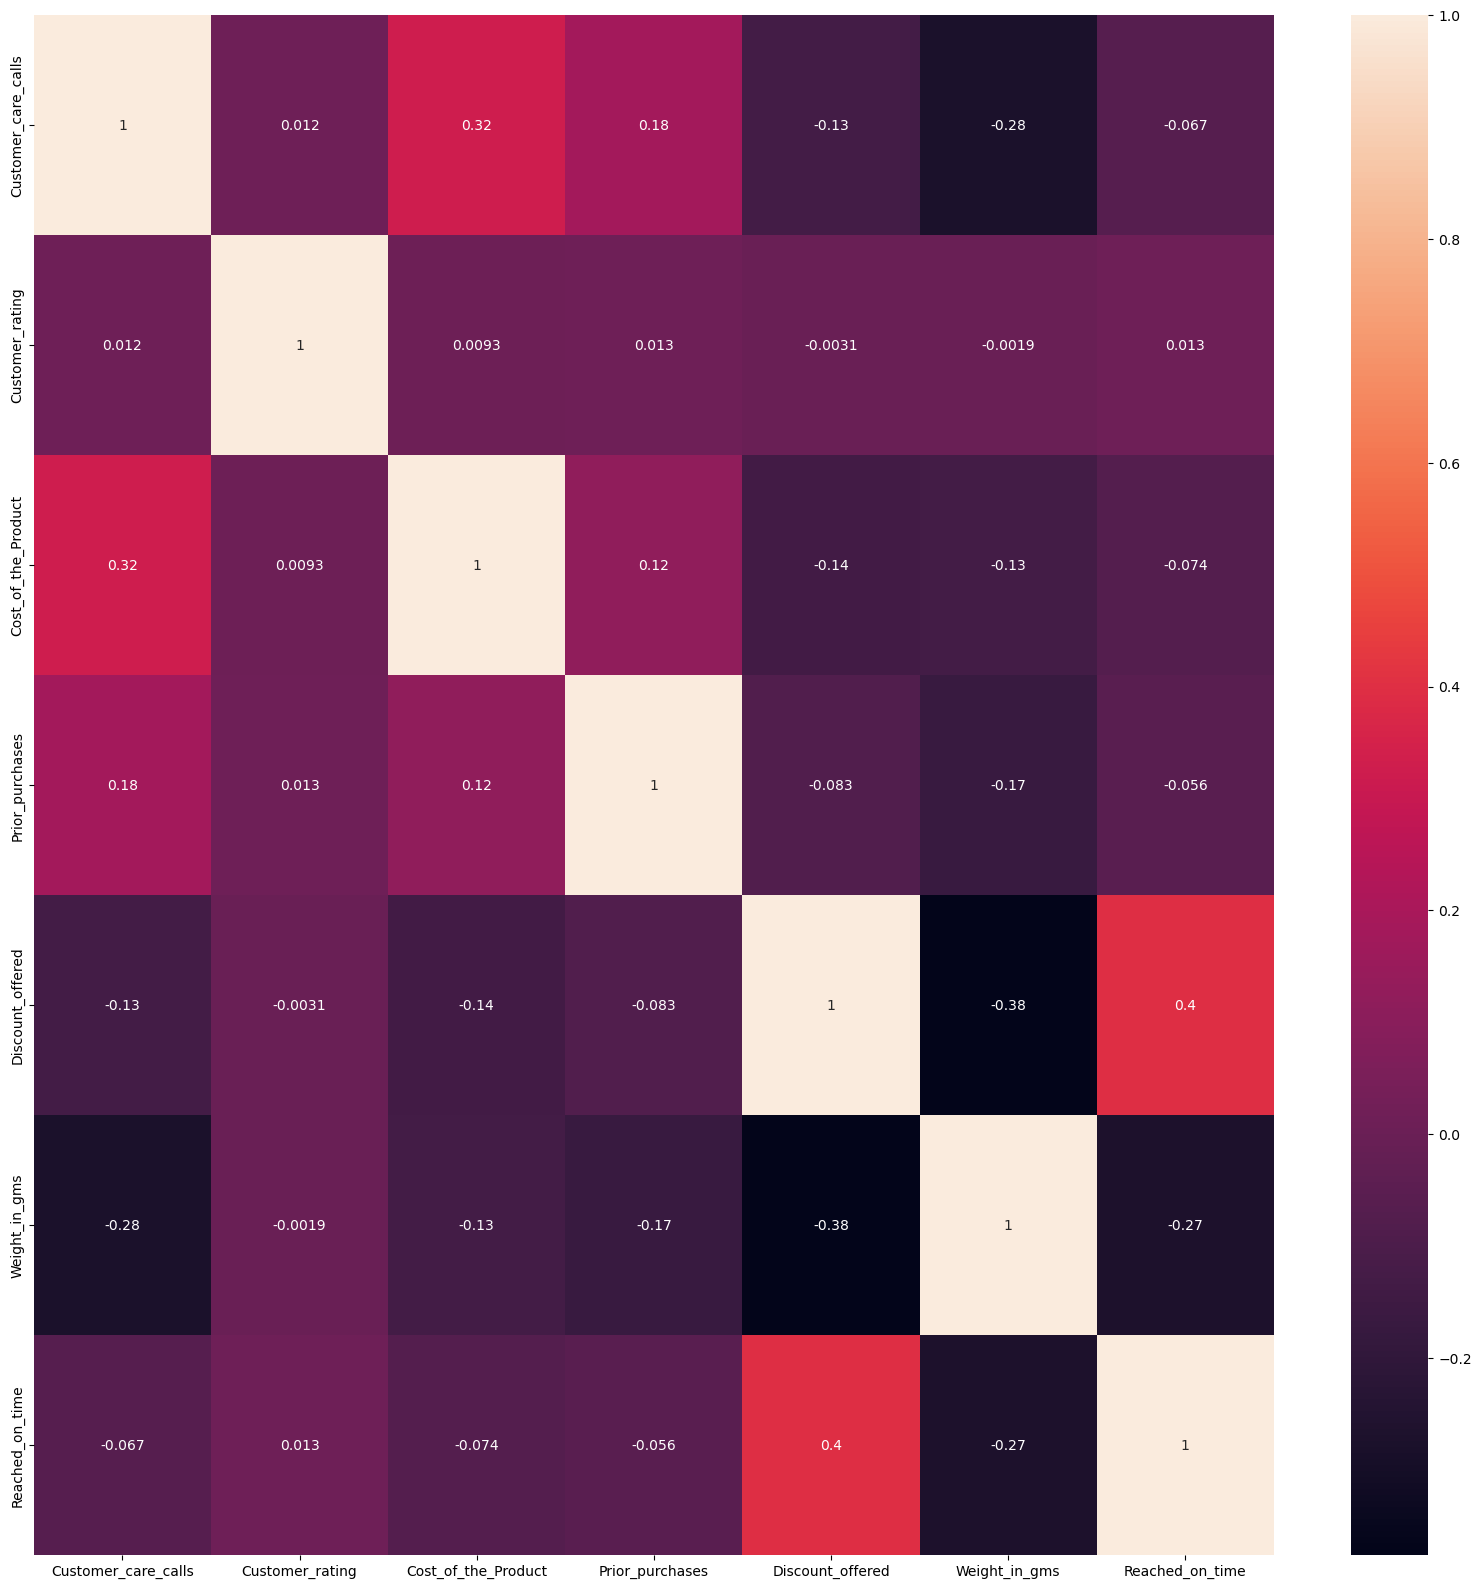

In [15]:
# membuat heatmap dan mencari korelasi numeric menggunakan pearson
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(method='pearson'),annot=True)

Dikarenakan kita akan mencari korelasi antar kolom numerical dan dengan asumsi bahwa terdapat outlier maka digunakan pearson untuk mencari korelasi. Dari hasil korelasi di atas terlihat bahwa kolom seperti Discount_offered memiliki korelasi positif yang kuat dengan kolom Reached_on_time. Kolom Weight_in_gms memiliki korelasi yang sangat lemah dengan nilai -0.27 untuk itu tidak akan kita jadikan feature.Beberapa kolom lain seperti Customer_care_calls, Customer_rating, Cost_of_the_Product dan Prior_purchases meskipun memiliki korelasi yang lemah terhadap kolom Reached_on_time, kolom-kolom tersebut akan tetap dijadikan feature berdasarkan domain knowledge karena kolom tersebut masih berhubungan, terbukti pada tahap EDA dapat terlihat bahwa beberapa kolom sedikit mempengaruhi Reached_on_time.

In [16]:
# mencari korelasi menggunakan kendalltau
for i in cat.columns :
    corr_tau, pval_k = stats.kendalltau(cat[i],cat['Reached_on_time'])
    print(f"tau-correlation {i}: {corr_tau}, p-value: {pval_k}")

tau-correlation Warehouse_block: 0.004477851103889882, p-value: 0.6017186431111509
tau-correlation Mode_of_Shipment: 0.0009956906548788905, p-value: 0.9136885516159616
tau-correlation Product_importance: -0.019268996430426025, p-value: 0.036881733051597476
tau-correlation Gender: 0.004688874337141514, p-value: 0.6229112309341156
tau-correlation Reached_on_time: 0.9999999999999998, p-value: 0.0


Karena kita ingin mencari korelasi kolom kategorikal, maka akan digunakan kendall. Dari hasil perhitungan korelasi menggunakan kendall untuk kolom kategorikal, hanya kolom Product_importance yang memiliki korelasi kuat dengan Reached_on_time. Namun, berdasarkan domain knowledge bahwa kolom seperti Warehouse_block dan Mode_of_Shipment juga memiliki hubungan dengan apakah barang akan sampai tepat waktu atau tidak, maka kolom tersebut akan dijadikan feature.

In [17]:
# Membuat variabel baru yang berisi kolom-kolom yang akan digunakan untuk membuat model
df3 = df[['Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Warehouse_block', 'Mode_of_Shipment', 'Prior_purchases', 'Product_importance', 'Reached_on_time']]
df3

,Discount_offered,Customer_care_calls,Customer_rating,Cost_of_the_Product,Warehouse_block,Mode_of_Shipment,Prior_purchases,Product_importance,Reached_on_time
0,44,4,2,177,D,Flight,3,low,1
1,59,4,5,216,F,Flight,2,low,1
2,48,2,2,183,A,Flight,4,low,1
3,10,3,3,176,B,Flight,4,medium,1
4,46,2,2,184,C,Flight,3,medium,1
...,...,...,...,...,...,...,...,...,...
10994,1,4,1,252,A,Ship,5,medium,1
10995,6,4,1,232,B,Ship,5,medium,0
10996,4,5,4,242,C,Ship,5,low,0
10997,2,5,2,223,F,Ship,6,medium,0


### Split antara X dan y

In [18]:
#Splitting antara 'X' dan 'y'
X = df3.drop(['Reached_on_time'], axis=1)
y = df3['Reached_on_time']

# Meload data
X

,Discount_offered,Customer_care_calls,Customer_rating,Cost_of_the_Product,Warehouse_block,Mode_of_Shipment,Prior_purchases,Product_importance
0,44,4,2,177,D,Flight,3,low
1,59,4,5,216,F,Flight,2,low
2,48,2,2,183,A,Flight,4,low
3,10,3,3,176,B,Flight,4,medium
4,46,2,2,184,C,Flight,3,medium
...,...,...,...,...,...,...,...,...
10994,1,4,1,252,A,Ship,5,medium
10995,6,4,1,232,B,Ship,5,medium
10996,4,5,4,242,C,Ship,5,low
10997,2,5,2,223,F,Ship,6,medium


In [19]:
# Meload data y
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached_on_time, Length: 10999, dtype: int64

Dapat terlihat bahwa X dan y sudah terpisah menjadi feature (X) dan target (y)

In [20]:
# Splitting antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify=y)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (8799, 8)
Test Size:  (2200, 8)


### Cek multicolinearity

In [21]:
# Mencari nilai unique pada kolom
col_uniq = ['Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Warehouse_block', 'Mode_of_Shipment', 'Prior_purchases', 'Product_importance']

for column in col_uniq:
    unique_values_count = df3[column].nunique()
    print(f"Jumlah unique value pada {column}: {unique_values_count}")

Jumlah unique value pada Discount_offered: 65
Jumlah unique value pada Customer_care_calls: 6
Jumlah unique value pada Customer_rating: 5
Jumlah unique value pada Cost_of_the_Product: 215
Jumlah unique value pada Warehouse_block: 5
Jumlah unique value pada Mode_of_Shipment: 3
Jumlah unique value pada Prior_purchases: 8
Jumlah unique value pada Product_importance: 3


Dari hasil diatas diketahui bahwa kolom-kolomnya merupakan low cardinality

### Handling Outlier

In [22]:
# Melakukan cek skewness pada kolom
cek_skew = ['Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases']

skewness = df2[cek_skew].skew()
for column, skew in skewness.items():
    print(f"Skewness '{column}': {skew}")


Skewness 'Discount_offered': 1.7989291087435189
Skewness 'Customer_care_calls': 0.3919257752012462
Skewness 'Customer_rating': 0.0043595990691731885
Skewness 'Cost_of_the_Product': -0.15711711926913643
Skewness 'Prior_purchases': 1.6818973153494547


Dari hasil cek skewness terlihat bahwa kolom 'Prior_purchases' dan 'Discount_offered' positively skewed dan kemungkinan terdapat outlier. Untuk lebih jelasnya kita akan melihatnya menggunakan boxplot.

<Axes: >

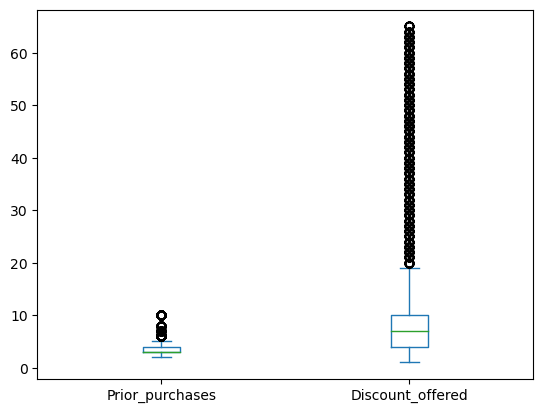

In [23]:
# Membuat boxplot
X_train[['Prior_purchases', 'Discount_offered']].plot(kind='box')

Dari hasil visualisasi diatas terlihat bahwa terdapat outlier pada kolom Prior_purchases. dan akan kita handling outlier.

In [24]:
# melakukan capping menggunakan winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Prior_purchases', 'Discount_offered'])

X_train = winsorizer.fit_transform(X_train)
X_test = winsorizer.transform(X_test)

Alasan menggunakan winsorizer untuk handling outlier adalah karena Winsorizer dapat membantu mengurangi bias dan meningkatkan akurasi hasil analisis. Karena, Winsorizer bekerja dengan cara nilai-nilai yang berada di luar batas atas dan batas bawah diganti dengan nilai-nilai yang ada di batas atas dan batas bawah. Dengan kata lain, jika nilai sebuah observasi melebihi batas atas, maka nilai tersebut akan digantikan dengan nilai batas atas, dan jika nilai observasi lebih rendah dari batas bawah, maka nilai tersebut akan digantikan dengan nilai batas bawah. 

<Axes: >

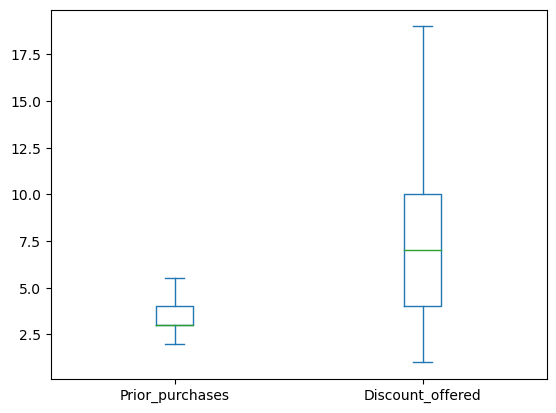

In [25]:
# Membuat boxplot
X_train[['Prior_purchases', 'Discount_offered']].plot(kind='box')

Terlihat dari boxplot bahwa sudah tidak terdapat outlier dan data terdistribusi dengan normal.

### Pipeline

In [26]:
# Membuat pipeline
one_hot_cols = ['Product_importance', 'Mode_of_Shipment', 'Warehouse_block']
standardize_cols = ['Discount_offered', 'Cost_of_the_Product']
remainder_cols = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']

# Mendefinisikan transformer
onehot_transformer = OneHotEncoder()
std_scaler_transformer = StandardScaler()

# Membuat column transformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, one_hot_cols),
    ('std_scaler', std_scaler_transformer, standardize_cols)
], remainder='passthrough')

Membuat variabel pada kolom dalam dataset yang akan diproses secara berbeda dalam pipeline. One hot encoding digunakan untuk kolom-kolom kategorikal seperti 'Product_importance', 'Mode_of_Shipment', 'Warehouse_block'. Alasan untuk tidak menggunakan ordinal encoding untuk kolom 'Product_importance' adalah karena unique valuenya sedikit dan penggunaan one hot encoding lebih tepat karena menghasilkan representasi kategori biner, yang dapat membuat model lebih mudah diinterpretasikan. Setiap kategori diwakili oleh fitur binernya sendiri, sehingga jelas kategori mana yang dirujuk dalam model. Untuk kolom-kolom seperti 'Customer_care_calls', 'Customer_rating', 'Prior_purchases' tidak dilakukan encoding karena sudah terencode dari asalnya.

Untuk melakukan scaling akan digunakan StandardScaler dikarenakan StandardScaler menyesuaikan fitur-fitur sehingga memiliki mean 0 dan varians 1, sehingga hasilnya bisa lebih mudah diinterpretasikan dalam konteks analisis statistik yang bergantung pada distribusi normal dan dikarenakan kita sudah melakukan handling outlier dan distribusinya normal maka akan digunakan StandardScaler.

## 6. Model Definition

### Model KNN

In [27]:
# Membuat pipeline untuk KNN
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())

print('Pipeline steps : ', knn_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Product_importance', 'Mode_of_Shipment',
                                  'Warehouse_block']),
                                ('std_scaler', StandardScaler(),
                                 ['Discount_offered', 'Cost_of_the_Product'])])), ('kneighborsclassifier', KNeighborsClassifier())]


<b>K-Nearest Neighbor</b> merupakan salah satu metode Machine Learning yang berfungsi untuk mengambil keputusan menggunakan Supervised Learning dimana hasil dari data masukan yang baru diklasifikasi berdasarkan terdekat dalam data nilai. Cara kerja algoritma K-Nearest Neighbor (KNN) adalah melakukan klasifikasi terhadap objek yang berdasarkan dari data pembelajaran yang jaraknya paling dekat dengan objek tersebut. Dimana kelas yang paling banyak muncul yang nantinya akan menjadi kelas hasil dari klasifikasi.



### Model SVM

In [28]:
# Membuat pipeline untuk SVM
svm_pipeline = make_pipeline(preprocessor, SVC())

print('Pipeline steps : ', svm_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Product_importance', 'Mode_of_Shipment',
                                  'Warehouse_block']),
                                ('std_scaler', StandardScaler(),
                                 ['Discount_offered', 'Cost_of_the_Product'])])), ('svc', SVC())]


<b>SVM (Support Vector Machine) </b> adalah algoritma dalam machine learning yang digunakan untuk masalah klasifikasi dan regresi. SVM beroperasi dengan cara mencari hyperplane optimal yang memisahkan dua kelas data dalam ruang fitur. Hyperplane ini dipilih sedemikian rupa sehingga jarak antara hyperplane dan titik-titik terdekat dari kedua kelas, yang disebut vektor pendukung (support vectors), maksimal.

### Model Decision Tree

In [29]:
# Membuat pipeline untuk Decision Tree
tree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier())
print('Pipeline steps : ', tree_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Product_importance', 'Mode_of_Shipment',
                                  'Warehouse_block']),
                                ('std_scaler', StandardScaler(),
                                 ['Discount_offered', 'Cost_of_the_Product'])])), ('decisiontreeclassifier', DecisionTreeClassifier())]


<b>Decision tree</b> adalah model dalam machine learning yang bekerja dengan cara mengambil bentuk seperti pohon, di mana setiap node dalam pohon mewakili keputusan berdasarkan fitur-fitur dari data yang diberikan. Decision tree memecah dataset menjadi subset yang lebih kecil berdasarkan fitur-fitur yang paling signifikan, sehingga menghasilkan prediksi akhir.

### Model Random Forest

In [30]:
# Membuat pipeline untuk Random Forest
rdf_pipeline = make_pipeline(preprocessor, RandomForestClassifier())
print('Pipeline steps : ', rdf_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Product_importance', 'Mode_of_Shipment',
                                  'Warehouse_block']),
                                ('std_scaler', StandardScaler(),
                                 ['Discount_offered', 'Cost_of_the_Product'])])), ('randomforestclassifier', RandomForestClassifier())]


Random Forest adalah algoritma machine learning yang berdasarkan konsep ensemble learning, di mana ia membangun beberapa decision trees saat melatih model dan menggabungkan prediksi dari setiap decision trees untuk membuat prediksi akhir. Random Forest menggabungkan keunggulan dari banyak decision trees dalam mengurangi overfitting dan meningkatkan akurasi prediksi.

### Model XGBoost

In [31]:
xgb_pipeline = make_pipeline(preprocessor, XGBClassifier())
print('Pipeline steps : ', xgb_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Product_importance', 'Mode_of_Shipment',
                                  'Warehouse_block']),
                                ('std_scaler', StandardScaler(),
                                 ['Discount_offered', 'Cost_of_the_Product'])])), ('xgbclassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
        

<b> XGBoost </b> adalah implementasi dari teknik gradient boosting, di mana model dilatih secara berurutan untuk memperbaiki kesalahan prediksi model sebelumnya.

## 7. Model Training

### KNN Training

In [32]:
# Melakukan training KNN
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### SVM Training

In [33]:
# Melakukan training SVM
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('svc', SVC())])

### Decision Tree Training

In [34]:
# Melakukan training Decision Tree
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### Random Forest Training

In [35]:
# Melakukan training Random Forest
rdf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('randomforestclassifier', RandomForestClassifier())])

### XGBoost Training

In [36]:
# Melakukan training XGBoost
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 8. Model Evaluation

Pada kasus ini, kita ingin meminimalisir False Negative, yaitu ketika model memperkirakan suatu produk telah sampai tepat waktu (y = 0), namun kenyataannya belum sampai tepat waktu (y = 1). Untuk meminimalkan False Negative, akan digunakan matrix yang secara khusus mengatasi hal ini, yaitu Recall atau True Positive Rate (TPR). Recall mengukur proporsi True Positive yang diidentifikasi dengan benar oleh model, yang pada dasarnya merupakan kebalikan dari False Negative.

In [37]:
# Mendefinisikan StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Kalkulasi cross-validation scores
knn_cv_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=skf, scoring="recall")
svm_cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=skf, scoring="recall")
tree_cv_scores = cross_val_score(tree_pipeline, X_train, y_train, cv=skf, scoring="recall")
rdf_cv_scores = cross_val_score(rdf_pipeline, X_train, y_train, cv=skf, scoring="recall")
xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=skf, scoring="recall")

print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Mean:", np.mean(knn_cv_scores))
print("KNN Standard Deviation:", np.std(knn_cv_scores))
print("KNN Range:", (knn_cv_scores.mean()-knn_cv_scores.std()) , '-', (knn_cv_scores.mean()+knn_cv_scores.std()))

print("=====================================")

print("SVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean:", np.mean(svm_cv_scores))
print("SVM Standard Deviation:", np.std(svm_cv_scores))
print("SVM Range:", (svm_cv_scores.mean()-svm_cv_scores.std()) , '-', (svm_cv_scores.mean()+svm_cv_scores.std()))

print("=====================================")

print("Decision Tree Cross-Validation Scores:", tree_cv_scores)
print("Decision Tree Mean:", np.mean(tree_cv_scores))
print("Decision Tree Standard Deviation:", np.std(tree_cv_scores))
print("Decision Tree Range:", (tree_cv_scores.mean()-tree_cv_scores.std()) , '-', (tree_cv_scores.mean()+tree_cv_scores.std()))

print("=====================================")

print("Random Forest Cross-Validation Scores:", rdf_cv_scores)
print("Random Forest Mean:", np.mean(rdf_cv_scores))
print("Random Forest Standard Deviation:", np.std(rdf_cv_scores))
print("Random Forest Range:", (rdf_cv_scores.mean()-rdf_cv_scores.std()) , '-', (rdf_cv_scores.mean()+rdf_cv_scores.std()))

print("=====================================")

print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("XGBoost Mean:", np.mean(xgb_cv_scores))
print("XGBoost Standard Deviation:", np.std(xgb_cv_scores))
print("XGBoost Range:", (xgb_cv_scores.mean()-xgb_cv_scores.std()) , '-', (xgb_cv_scores.mean()+xgb_cv_scores.std()))

KNN Cross-Validation Scores: [0.71714286 0.66571429 0.66       0.64571429 0.68190476]
KNN Mean: 0.6740952380952381
KNN Standard Deviation: 0.024447824956930576
KNN Range: 0.6496474131383075 - 0.6985430630521686
SVM Cross-Validation Scores: [0.59142857 0.47619048 0.43714286 0.47714286 0.53333333]
SVM Mean: 0.5030476190476191
SVM Standard Deviation: 0.05378516094068107
SVM Range: 0.449262458106938 - 0.5568327799883002
Decision Tree Cross-Validation Scores: [0.69047619 0.67142857 0.67428571 0.6552381  0.68      ]
Decision Tree Mean: 0.6742857142857144
Decision Tree Standard Deviation: 0.011539147604465482
Decision Tree Range: 0.6627465666812489 - 0.6858248618901799
Random Forest Cross-Validation Scores: [0.66952381 0.63619048 0.64761905 0.63714286 0.67142857]
Random Forest Mean: 0.6523809523809523
Random Forest Standard Deviation: 0.015321201944525856
Random Forest Range: 0.6370597504364264 - 0.6677021543254782
XGBoost Cross-Validation Scores: [0.68       0.65142857 0.6447619  0.62952381 

Di antara kelima model, model Decision Tree memiliki rata-rata skor cross-validation tertinggi 0.6742857142857144, yang menunjukkan bahwa model tersebut memiliki performa lebih baik pada dataset ini dibandingkan model lainnya. Hal ini mungkin disebabkan oleh sifat datanya. Model Decision Tree memiliki standar deviasi terendah, yang menunjukkan bahwa kinerjanya cukup konsisten di berbagai bagian kumpulan data. Untuk itu, Decision Tree akan digunakan untuk selanjutnya dilakukan hypertuning.

Classification Report Decision Tree Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3549
           1       1.00      1.00      1.00      5250

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799

Classification Report Decision Tree Test: 
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       887
           1       0.69      0.70      0.69      1313

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.63      0.63      2200



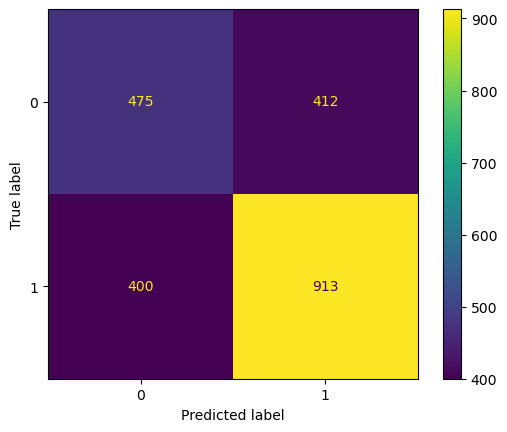

In [38]:
# Predict Train-set and Test-set
y_pred_train_tree = tree_pipeline.predict(X_train)
y_pred_test_tree = tree_pipeline.predict(X_test)

# Print classification report
print('Classification Report Decision Tree Train: ')
print(classification_report(y_train, y_pred_train_tree))
print('Classification Report Decision Tree Test: ')
print(classification_report(y_test, y_pred_test_tree))

cm_tree = confusion_matrix(y_test, y_pred_test_tree)
ConfusionMatrixDisplay(cm_tree).plot()

Dari hasil <b>Classification Report</b>, kita bisa melihat bahwa training data Decision Tree menunjukkan skor sempurna (1,00) untuk precision, recall, dan f1-score untuk kedua kelas (0 dan 1). Ini merupakan indikator kuat terjadinya overfitting. Overfitting terjadi ketika model mempelajari data pelatihan dengan terlalu baik, termasuk noise dan outliernya, sehingga kurang efektif dalam menggeneralisasi data baru yang tidak terlihat. Bisa dilihat juga terdapat perbedaan nilai signifikan antara nilai recall train dan test. Untuk itu, akan kita lakukan tuning untuk membuat model lebih baik.

Dari <b>Confusion Matrix</b>  kita dapat mengambil kesimpulan bahwa terdapat 400 kasus di mana prediksi model terlalu optimis, yang menunjukkan bahwa pengiriman tepat waktu padahal sebenarnya tidak (False Negative). Ini berarti model tersebut gagal mengidentifikasi potensi masalah atau penundaan di hampir 400 kasus. Meningkatkan sensitivitas model terhadap kasus keterlambatan pengiriman berpotensi bermanfaat untuk memenuhi kepuasan pelanggan dan efisiensi operasional.Meskipun model tersebut memiliki jumlah prediksi benar yang relatif tinggi untuk keterlambatan pengiriman True Positive = 913, jumlah False Negative = 400 cukup signifikan dan dapat menjadi perhatian lebih.


### Hyperparameter Tuning

In [39]:
# Mendefinisikan parameter untuk tuning
param_dist = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'], 
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40, 50],  
    'decisiontreeclassifier__min_samples_split': uniform(0.01, 0.199),  
    'decisiontreeclassifier__min_samples_leaf': uniform(0.01, 0.199),  
}

# Mendefinisikan random search untuk decision tree
random_search = RandomizedSearchCV(estimator=tree_pipeline,
                                      param_distributions=param_dist,
                                      n_iter=100, 
                                      scoring='recall',  
                                      cv=5,  
                                      verbose=1,
                                      random_state=42,
                                      n_jobs=-1  
                                      )

# Menjalankan random search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Product_importance',
                                                                                'Mode_of_Shipment',
                                                                                'Warehouse_block']),
                                                                              ('std_scaler',
                                                                               StandardScaler(),
                                                                               ['Discount_offered',
                                                                                'Cost_of_the_Product'])])),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier())]),
                   n_it...
                                        'decisiontreeclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30,
                                                                              40,
                                                                              50],
                                        'decisiontreeclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EB65B36010>,
                                        'decisiontreeclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EB661609D0>},
                   random_state=42, scoring='recall', verbose=1)

In [40]:
# Print the best parameters
random_search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__min_samples_leaf': 0.015058406222074943,
 'decisiontreeclassifier__min_samples_split': 0.031470393971667586}

In [41]:
# Print the best score
random_search.best_score_

0.6177142857142858

In [42]:
# membuat variabel untuk best parameter
best_tree = random_search.best_estimator_
best_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Product_importance',
                                                   'Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['Discount_offered',
                                                   'Cost_of_the_Product'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10,
                                        min_samples_leaf=0.015058406222074943,
                                        min_samples_split=0.031470393971667586))])

In [46]:
# Kalkulasi cross-validation scores
tree_cv_scores = cross_val_score(best_tree, X_train, y_train, cv=skf, scoring="recall")
print("Decision Tree Cross-Validation Scores:", tree_cv_scores)
print("Decision Tree Mean:", np.mean(tree_cv_scores))
print("Decision Tree Standard Deviation:", np.std(tree_cv_scores))
print("Decision Tree Range:", (tree_cv_scores.mean()-tree_cv_scores.std()) , '-', (tree_cv_scores.mean()+tree_cv_scores.std()))


Decision Tree Cross-Validation Scores: [0.67238095 0.58666667 0.62       0.58761905 0.62190476]
Decision Tree Mean: 0.6177142857142858
Decision Tree Standard Deviation: 0.031243901899341776
Decision Tree Range: 0.586470383814944 - 0.6489581876136276


Setelah dilakukan tuning terlihat bahwa nilai rata-rata pada Cross-Validation Scores adalah 0.6177142857142858 sedikit lebih rendah dari sebelum dituning yaitu 0.6742857142857144. Untuk mencari lebih jauh akan kita cek classification report untuk mengetahui apakah overfitnya sudah teratasi.

Classification Report Decision Tree Train After Tuning: 
              precision    recall  f1-score   support

           0       0.57      0.70      0.63      3549
           1       0.76      0.64      0.69      5250

    accuracy                           0.66      8799
   macro avg       0.66      0.67      0.66      8799
weighted avg       0.68      0.66      0.67      8799

Classification Report Decision Tree Test After Tuning: 
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       887
           1       0.73      0.61      0.66      1313

    accuracy                           0.63      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.63      0.63      2200



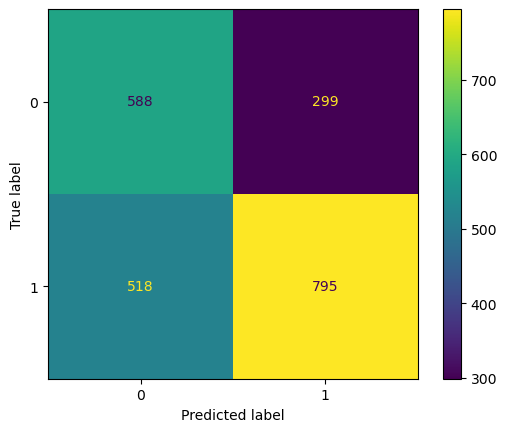

In [47]:
# Predict Train-set and Test-set
y_pred_train_tree_tuning = best_tree.predict(X_train)
y_pred_test_tree_tuning = best_tree.predict(X_test)

# Print classification report
print('Classification Report Decision Tree Train After Tuning: ')
print(classification_report(y_train, y_pred_train_tree_tuning))
print('Classification Report Decision Tree Test After Tuning: ')
print(classification_report(y_test, y_pred_test_tree_tuning))

cm_tree = confusion_matrix(y_test, y_pred_test_tree_tuning)
ConfusionMatrixDisplay(cm_tree).plot()

<b>Classification Report </b>: Tuning telah menghasilkan nilai yang seimbang antara train dan test. Hal ini terlihat dari peningkatan precision, recall, dan f1-score untuk kedua kelas (0 dan 1) pada data test dibandingkan dengan model yang tidak dituning.
Nilai precision dan recall untuk kedua kelas kini lebih seimbang, yang menunjukkan bahwa model membuat lebih sedikit kesalahan di keduanya setelah tuning. Secara keseluruhan, model Decision Tree yang dituning menunjukkan peningkatan kinerja generalisasi, dengan keseimbangan yang lebih baik antara precision dan recall, sehingga lebih selaras dengan tujuan utama yaitu meminimalkan false negatives. Untuk nilai recall nya kita mendapatkan nilai recall yang tidak terlalu jauh antara train dan test pada 1 yaitu di angka 64% untuk train dan 61% untuk test.

<b>Confussion Matrix</b>:
Saat kita membandingkan hasil ini dengan confusion matrix sebelum tuning, kita dapat menarik kesimpulan berikut:

- Jumlah true negative telah meningkat dari 476 menjadi 588, yang berarti model tersebut kini lebih akurat dalam memprediksi kapan produk akan sampai tepat waktu.

- Jumlah false positives telah menurun dari 412 menjadi 299, menunjukkan bahwa model menjadi lebih baik dalam memprediksi penundaan dengan tidak salah.

- Jumlah true positives sebenarnya telah menurun dari 913 menjadi 795. Hal ini menunjukkan bahwa meskipun model tersebut membuat lebih sedikit kesalahan secara keseluruhan (dengan kesalahan positif yang lebih sedikit), model ini juga mengidentifikasi lebih sedikit keterlambatan pengiriman sebenarnya dengan benar.

- Jumlah false negatives telah meningkat dari 400 menjadi 518. Hal ini menjadi perhatian karena berarti model tersebut kini salah memprediksi pengiriman yang lebih tepat waktu padahal kenyataannya produk tidak sampai tepat waktu.

Setelah membandingkan hasil setelah dan sebelum tuning berdasarkan Cross Validation Score, Classification Report dan Confussion Matrix, kita mengambil kesimpulan bahwa hasil tuning merupakan model yang lebih baik dan akan dipakai dikarenakan secara keseluruhan lebih baik dibandingkan sebelum dituning.


## 9. Model Saving

In [44]:
# Menyimpan model
with open('model.pkl', 'wb') as model:
  pickle.dump(best_tree, model)

## 10. Model Inference

Model inference terdapat pada P1M2_panji_putra_inf

## 11. Pengambilan Kesimpulan

Berdasarkan dataset yang kita ambil tentang pengiriman barang-barang e-commerce dengan jumlah data 10999 dan total 12 kolom. Kita telah berhasil membuat model yang digunakan untuk memprediksi apakah barang akan sampai tepat waktu (0) atau barang tidak sampai tepat waktu (1). 
  
Dari hasil pengujian menggunakan 5 model yang berbeda yaitu menggunakan KNN, SVM, Decision Tree, Random Forest dan XGBoost. Kita mendapatkan bahwa hasil dari model Decision Tree merupakan yang terbaik dibandingkan dengan model lainnya, dikarenakan Decision Tree memiliki rata-rata skor cross-validation tertinggi dan juga memiliki standar deviasi terendah, yang menunjukkan bahwa kinerjanya cukup konsisten di berbagai bagian kumpulan data. Namun, dikarenakan terdapat indikasi bahwa model overfitting dan performa pada testnya sangat rendah maka kita lakukan tuning untuk memaksimalkan model.

Setelah dilakukan tuning, hasil train dan test menjadi lebih balance. Meskipun, masih terdapat kelemahan pada model seperti, terlihat bahwa terjadi ketidakseimbangan antara hasil recall score pada 1 dan 0. Hal ini bisa terjadi dikarenakan kurang baiknya data yang ada pada dataset. Mungkin model yang dibuat akan bisa menjadi lebih baik jika dataset yang ada bisa diperbaiki sehingga hasilnya bisa lebih seimbang untuk menghindari imbalance pada data yang menghasilkan ketidakseimbangan pada hasil score model. 

Dengan hasil ini terdapat beberapa saran yang bisa dilakukan untuk meningkatkan barang sampai tepat waktu seperti:
- Perusahaan bisa lebih memantau terkait banyaknya barang yang akan dikirimkan sehingga bisa membuat strategi yang lebih relevan untuk bisa membuat barang sampai tepat waktu.
- Memanfaatkan model machine learning yang sudah dibangun untuk memprediksi ketepatan waktu pengiriman. Dengan cara ini, perusahaan dapat mengenali pengiriman yang mungkin akan terlambat dan mengambil tindakan pencegahan yang sesuai.
- Meningkatkan penanganan keluhan pelanggan dengan memberikan informasi pengiriman yang lebih tepat waktu atau memberikan insentif kepada pelanggan yang mengalami keterlambatan dapat menjadi solusi yang efektif. Ini akan membantu memperbaiki pengalaman pelanggan dan membangun kepercayaan dengan memberikan layanan yang lebih baik.